In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import time
import re
import nltk
import math
import os
import matplotlib.pyplot as plt
import sklearn.metrics
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import roc_auc_score
from Bio.SeqUtils.ProtParam import ProteinAnalysis
import sklearn.metrics
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE

%matplotlib inline


In [2]:
df_ER = pd.read_csv('uniprot-ER-reviewed.csv')

df_ER.head()

,name,sequence,location,label
0,sp|P30040|ERP29_HUMAN,MAAAVPRAAFLSPLLPLLLGFLLLSAPHGGSGLHTKGALPLDTVTF...,0,ER
1,sp|P16615|AT2A2_HUMAN,MENAHTKTVEEVLGHFGVNESTGLSLEQVKKLKERWGSNELPAEEG...,0,ER
2,sp|Q64578|AT2A1_RAT,MEAAHSKSTEECLSYFGVSETTGLTPDQVKRHLEKYGPNELPAEEG...,0,ER
3,sp|Q8R429|AT2A1_MOUSE,MEAAHSKSTEECLSYFGVSETTGLTPDQVKRHLEKYGPNELPAEEG...,0,ER
4,sp|O55143|AT2A2_MOUSE,MENAHTKTVEEVLGHFGVNESTGLSLEQVKKLKERWGSNELPAEEG...,0,ER


In [3]:
df_gol = pd.read_csv('uniprot-golgi-reviewed.csv')

df_gol.head()

,name,sequence,location,label
0,sp|O00461|GOLI4_HUMAN,MGNGMCSRKQKRIFQTLLLLTVVFGFLYGAMLYYELQTQLRKAEAV...,1,Golgi
1,sp|O43493|TGON2_HUMAN,MRFVVALVLLNVAAAGAVPLLATESVKQEEAGVRPSAGNVSTHPSL...,1,Golgi
2,sp|Q9BQQ3|GORS1_HUMAN,MGLGVSAEQPAGGAEGFHLHGVQENSPAQQAGLEPYFDFIITIGHS...,1,Golgi
3,sp|Q9UP83|COG5_HUMAN,MGWVGGRRRDSASPPGRSRSAADDINPAPANMEGGGGSVAVAGLGA...,1,Golgi
4,sp|Q9H3P7|GCP60_HUMAN,MAAVLNAERLEVSVDGLTLSPDPEERPGAEGAPLLPPPLPPPSPPG...,1,Golgi


In [4]:
df_mito = pd.read_csv('uniprot-mito-reviewed2.csv')

df_mito.head()

,name,sequence,location,label
0,sp|Q9BV35|SCMC3_HUMAN,MRGSPGDAERRQRWGRLFEELDSNKDGRVDVHELRQGLARLGGGNP...,6,mitochondria
1,sp|Q6NUK1|SCMC1_HUMAN,MLRWLRDFVLPTAACQDAEQPTRYETLFQALDRNGDGVVDIGELQE...,6,mitochondria
2,sp|Q9NUT2|MITOS_HUMAN,MLVHLFRVGIRGGPFPGRLLPPLRFQTFSAVRNTWRNGKTGQLHKA...,6,mitochondria
3,sp|Q6KCM7|SCMC2_HUMAN,MLCLCLYVPVIGEAQTEFQYFESKGLPAELKSIFKLSVFIPSQEFS...,6,mitochondria
4,sp|P53230|TAM41_YEAST,MLRVSENGLRFLLKCHSTNVSMFNRLLSTQIKEGRSSIDDAGIIPD...,6,mitochondria


In [5]:
#df_pm = pd.read_csv('uniprot-human-plasma-membrane.csv')
df_pm = pd.read_csv('uniprot-pm-reviewed.csv')
df_pm.head()

,name,sequence,location,label
0,sp|Q9GZC8|SID1_CAEEL,MIRVYLIILMHLVIGLTQNNSTTPSPIITSSNSSVLVFEISSKMKM...,9,plasma_membrane
1,sp|Q8KA41|FLIJ_BUCAP,MKYKKKIFSILENLEKKNIEKDIINIKNLYLQKEKYVTQLSLLKDY...,9,plasma_membrane
2,sp|Q5XI60|REEP6_RAT,MDGLRQRFERFLEQKNVATDALGALEARTGVEKRYLAAGALTLLGL...,9,plasma_membrane
3,sp|Q2FW71|SFAA_STAA8,MTKYFFSSSFLLFLGNWIGQIGLNWFVLTTYHNAVYLGIVNFCRLV...,9,plasma_membrane
4,sp|Q98D15|NORM_RHILO,MSAIDAGARAPENLWRQEIRATLALAWPMVLTNLGQTAMTATDVMM...,9,plasma_membrane


In [6]:
df_pm.shape

(23119, 4)

In [7]:
#df_cyto = pd.read_csv('uniprot-human-cytoplasm.csv')
df_cyto = pd.read_csv('uniprot-cytoplasm-20K.csv')
df_cyto.head()

,name,sequence,location,label
0,sp|Q9ZMG6|MIAB_HELPJ,MKVYIETMGCAMNSRDSEHLLSELSKLDYKETSDPKMADLILINTC...,3,cytoplasm
1,sp|O94201|PFKA1_CANAX,MPSSSDAINRISYISLVTSDNDKFNQTFQFYSQLGFRLTKSFSKVS...,3,cytoplasm
2,sp|B2G868|SYE_LACRJ,MDQKVRVRYAPSPTGFLHIGNAQSALFNYLFARHFDGTMVLRIEDT...,3,cytoplasm
3,sp|Q1LSV4|RRF_BAUCH,MINNIRQDAEVRMEKCLETFKNNISKLRTGRANPNLLDNIKVDYYG...,3,cytoplasm
4,sp|Q5I0E6|RPAP2_RAT,MADSAVPYSLGPSARASSTHRVATGTKQTSALKRRDASKRQAELEA...,3,cytoplasm


In [8]:
df_cyto.shape

(20502, 4)

In [9]:
df_gol = pd.read_csv('uniprot-golgi-unreviewed.csv')

df_gol.head()

,name,sequence,location,label
0,tr|J5RKF4|J5RKF4_SACK1,MDLTVEPNLHSLINSTTHKWIFVGGKGGVGKTTSSCSIAIQMALSQ...,1,Golgi
1,tr|A0A0L8RL88|A0A0L8RL88_SACEU,MDLTVEPNLHSLINSTTHKWIFVGGKGGVGKTTSSCSIAIQMALSQ...,1,Golgi
2,tr|J8LQG5|J8LQG5_SACAR,MDLTVEPNLHSLINSTTHKWIFVGGKGGVGKTTSSCSIAIQMALSQ...,1,Golgi
3,tr|A0A0L8VT44|A0A0L8VT44_9SACH,MDLTVEPNLHSLITSTTHKWIFVGGKGGVGKTTSSCSIAIQMALSQ...,1,Golgi
4,tr|G2WC64|G2WC64_YEASK,MDLTVEPNLHSLITSTTHKWIFVGGKGGVGKTTSSCSIAIQMALSQ...,1,Golgi


In [10]:
df_gol.shape

(78833, 4)

In [11]:
df_gol2 = df_gol.sample(frac=0.33)

In [12]:
df_gol2.shape

(26015, 4)

In [13]:
df_ER = pd.read_csv('uniprot-ER-136K.csv')

df_ER.head()

,name,sequence,location,label
0,sp|P30040|ERP29_HUMAN,MAAAVPRAAFLSPLLPLLLGFLLLSAPHGGSGLHTKGALPLDTVTF...,0,ER
1,sp|P16615|AT2A2_HUMAN,MENAHTKTVEEVLGHFGVNESTGLSLEQVKKLKERWGSNELPAEEG...,0,ER
2,sp|Q64578|AT2A1_RAT,MEAAHSKSTEECLSYFGVSETTGLTPDQVKRHLEKYGPNELPAEEG...,0,ER
3,sp|Q8R429|AT2A1_MOUSE,MEAAHSKSTEECLSYFGVSETTGLTPDQVKRHLEKYGPNELPAEEG...,0,ER
4,sp|O55143|AT2A2_MOUSE,MENAHTKTVEEVLGHFGVNESTGLSLEQVKKLKERWGSNELPAEEG...,0,ER


In [14]:
df_ER.shape

(124421, 4)

In [15]:
df_ER2 = df_ER.sample(frac=0.27)

In [16]:
df_ER2.shape

(33594, 4)

In [17]:
proteins = pd.concat([df_mito,df_pm,df_cyto,df_gol2,df_ER2])
proteins.head()

,name,sequence,location,label
0,sp|Q9BV35|SCMC3_HUMAN,MRGSPGDAERRQRWGRLFEELDSNKDGRVDVHELRQGLARLGGGNP...,6,mitochondria
1,sp|Q6NUK1|SCMC1_HUMAN,MLRWLRDFVLPTAACQDAEQPTRYETLFQALDRNGDGVVDIGELQE...,6,mitochondria
2,sp|Q9NUT2|MITOS_HUMAN,MLVHLFRVGIRGGPFPGRLLPPLRFQTFSAVRNTWRNGKTGQLHKA...,6,mitochondria
3,sp|Q6KCM7|SCMC2_HUMAN,MLCLCLYVPVIGEAQTEFQYFESKGLPAELKSIFKLSVFIPSQEFS...,6,mitochondria
4,sp|P53230|TAM41_YEAST,MLRVSENGLRFLLKCHSTNVSMFNRLLSTQIKEGRSSIDDAGIIPD...,6,mitochondria


In [18]:
proteins.shape

(127358, 4)

In [19]:
proteins.location.value_counts()

0    33594
1    26015
6    24128
9    23119
3    20502
Name: location, dtype: int64

In [20]:
proteins.label.value_counts()

ER                 33594
Golgi              26015
mitochondria       24128
plasma_membrane    23119
cytoplasm          20502
Name: label, dtype: int64

##   Classification 

In [21]:
proteins.shape

(127358, 4)

In [22]:
# remove the duplicate protein sequences
proteins = proteins.drop_duplicates(subset='sequence', keep="first")

# remove nan from 'sequence' column
proteins = proteins[proteins['sequence'].notnull()]

In [23]:
proteins.shape

(124267, 4)

In [24]:
# permute/scramble/shuffle rows of the dataframe
proteins = proteins.sample(frac=1)

In [25]:
proteins.location.value_counts()

0    32483
1    26001
6    24128
9    22257
3    19398
Name: location, dtype: int64

In [26]:
proteins.label.value_counts()

ER                 32483
Golgi              26001
mitochondria       24128
plasma_membrane    22257
cytoplasm          19398
Name: label, dtype: int64

## Transform the protein sequence data with CountVectorizer to get peptide frequency. Split the data into training & test sets.

In [27]:
# In this case, tripeptide frequency is used for analysis
#vect = CountVectorizer(min_df=1,token_pattern=r'\w{1}',ngram_range=(5,5))
vect = CountVectorizer(min_df=1,token_pattern=r'\w{1}',ngram_range=(4,4))

In [28]:
X = vect.fit_transform(proteins.sequence)
y = proteins.location

In [29]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state =42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(99413, 160091) (99413,)
(24854, 160091) (24854,)


In [30]:
y_test.value_counts()

0    6469
1    5262
6    4856
9    4476
3    3791
Name: location, dtype: int64

## Logistic Regression Model

In [31]:
# Logistic Regression 
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.predict(X_test)
print("Logistic Regression Score: {:.2f}".format(lr.score(X_test, y_test)))

/Users/scottlew/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/scottlew/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/scottlew/miniconda3/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Logistic Regression Score: 0.87


In [32]:
# Generate Confusion Matrix for Logistic Regression
actual = y_test
predictions = lr.predict(X_test)
print('Confusion Matrix for Logistic Regression Model')
print()
cm = confusion_matrix(actual,predictions)
print(cm)

Confusion Matrix for Logistic Regression Model

[[5923  174   46  177  149]
 [ 180 4911   41   81   49]
 [  37   22 3100  405  227]
 [ 150   36  335 3980  355]
 [ 129   31  278  427 3611]]


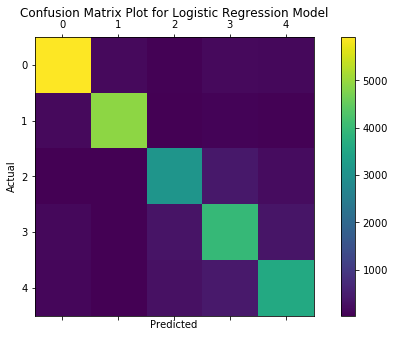

In [33]:
# Nice plot of confusion matrix
# Adjust size of confusion matrix by following code taken from StackOverflow
# https://stackoverflow.com/questions/43021762/matplotlib-how-to-change-figsize-for-matshow
plt.figure(figsize=(10,5))
plt.matshow(cm, fignum=1)

plt.title('Confusion Matrix Plot for Logistic Regression Model')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

## 63% accuracy with dipeptide count, 79% accuracy with tripeptide count, 87% accuracy with tetrapeptide count

## Random Forest

In [ ]:
#rf = RandomForestClassifier(n_estimators=100)
# instantiate random forest classifier

rf = RandomForestClassifier(random_state=3)

# fitting the model
rf.fit(X_train, y_train)

# evaluate accuracy of our model on test data
print("Random Forest classifier Score: {:.2f}".format(rf.score(X_test, y_test)))

In [ ]:
# Generate Confusion Matrix for Random Forest
actual = y_test
predictions = rf.predict(X_test)
print('Confusion Matrix for Random Forest Model')
print()
cm = confusion_matrix(actual,predictions)
print(cm)

In [ ]:
# Nice plot of confusion matrix
# Adjust size of confusion matrix by following code taken from StackOverflow
# https://stackoverflow.com/questions/43021762/matplotlib-how-to-change-figsize-for-matshow
plt.figure(figsize=(10,5))
plt.matshow(cm, fignum=1)

plt.title('Confusion Matrix Plot for Random Forest Model')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()